<a href="https://colab.research.google.com/github/analyticalaq/Blue-Bank/blob/main/Blue_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import json

**Read Json File**

In [ ]:
json_file=open('/content/drive/MyDrive/Blue Bank Analysis Project/loan_data_json.json')

In [ ]:
data=json.load(json_file)

**Transform to DataFrame**

In [ ]:
loandata=pd.DataFrame(data)

**Finding Unique Values for the purpose column**

In [ ]:
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

**Describe the data**

In [ ]:
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Describe the data for specific columns**

In [ ]:
loandata['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [ ]:
loandata['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [ ]:
loandata['dti'].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

**using EXP() function to get annual income**

In [ ]:
income=np.exp(loandata['log.annual.inc'])

In [ ]:
loandata['Annual_income']=income

In [ ]:
length=len(loandata)

**fico score**

In [ ]:
ficocat=[]

In [ ]:
for x in range(0,length):
  category=loandata['fico'][x]
  try:
    if category>=300 and category< 400:
      cat='Very Poor'
    elif category>=400 and category< 600:
        cat='Poor'
    elif category>=601 and category <660:
        cat='fair'
    elif category>=660 and category <700:
        cat='Good'
    elif category>=700:
        cat='Excellent'
    else:
        cat='Unknown'
  except:
    cat='Unknown'
  ficocat.append(cat)


**convert fico data into Series**

In [ ]:
ficocat=pd.Series(ficocat)

In [ ]:
loandata['fico.category']=ficocat

In [ ]:
loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Annual_income,fico.category,int.rate.type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Excellent,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Excellent,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Excellent,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good,High


**DataFrame.loc use as condtional statements**

In [ ]:
loandata.loc[loandata['int.rate']>0.12,'int.rate.type']='High'
loandata.loc[loandata['int.rate']<=0.12,'int.rate.type']='Low'

**Number of loans/row by fico category**

In [ ]:
catplot=loandata.groupby(['fico.category']).size()

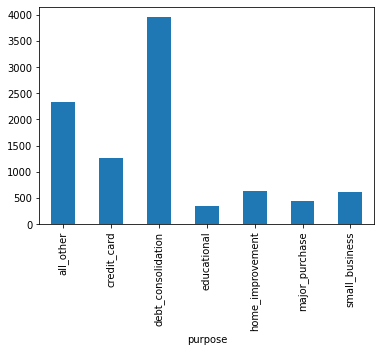

In [ ]:
catplot.plot.bar()
plt.show()

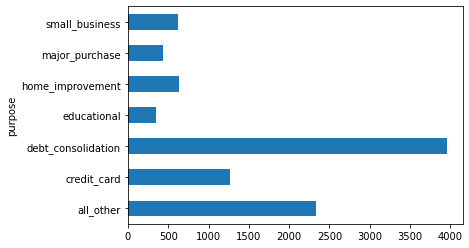

In [ ]:
catplot.plot.barh()
plt.show()

In [ ]:
purposecount=loandata.groupby(['purpose']).size()

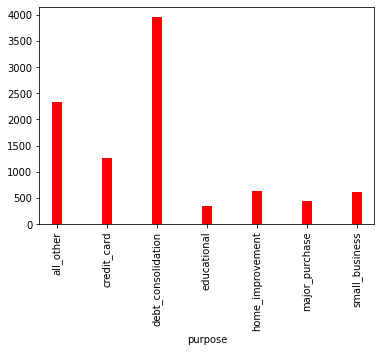

In [ ]:
purposecount.plot.bar(color='red',width=0.2)
plt.show()

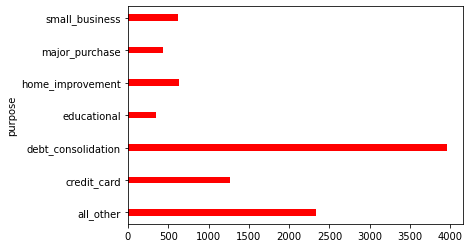

In [ ]:
purposecount.plot.barh(color='red',width=0.2)
plt.show()

**Scatter plot**

In [ ]:
xpoint=loandata['dti']
ypoint=loandata['Annual_income']

<function matplotlib.pyplot.show(*args, **kw)>

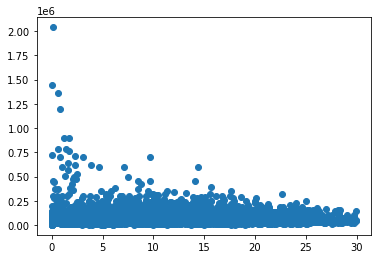

In [ ]:
plt.scatter(xpoint,ypoint)
plt.show

**Writing to csv**

In [ ]:
loandata.to_csv('loan_cleaned.csv',index=True)